# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,362,95,47,81,176,59,7,168,39,20,152,196,425,185,67,4,4,191,198
1,276,83,46,73,137,59,6,148,45,19,146,167,327,183,75,8,0,185,191
2,680,95,46,76,162,66,11,162,42,20,155,175,381,172,74,8,4,184,193
3,372,97,47,87,164,64,9,156,43,20,149,173,359,182,68,1,13,192,202
4,497,94,43,82,136,54,10,155,43,19,149,176,359,161,74,1,6,186,197
5,432,84,38,83,141,54,7,149,45,19,132,177,327,149,74,6,29,185,191
6,407,91,38,75,136,53,6,144,47,19,131,165,305,149,69,1,7,186,191
7,179,89,44,70,137,58,6,136,49,18,146,168,273,166,78,10,3,186,187
8,172,94,45,81,166,67,9,145,46,19,147,164,313,179,66,11,14,194,202
9,552,90,39,89,181,62,8,175,38,21,132,200,458,154,70,11,15,189,195


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000
mean,424.351548,93.422587,44.792350,81.795993,168.276867,61.557377,8.442623,168.633880,40.934426,20.564663,147.774135,188.353370,438.865209,174.085610,72.435337,6.23133,12.236794,189.060109,195.683060
std,244.633888,8.222051,6.072904,15.645313,32.260740,7.498107,4.242951,32.840896,7.730360,2.561276,14.406380,31.172508,174.591390,31.521658,7.321221,4.78166,8.686051,6.236667,7.448712
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.00000,0.000000,176.000000,181.000000
25%,224.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,150.000000,67.000000,2.00000,5.000000,184.000000,191.000000
50%,424.000000,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,173.000000,72.000000,5.00000,11.000000,189.000000,197.000000
75%,639.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,196.000000,46.000000,23.000000,159.000000,215.000000,576.000000,196.000000,76.000000,9.00000,18.000000,194.000000,201.000000
max,845.000000,116.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.00000,41.000000,204.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

pipe_X = Pipeline([('scaler', StandardScaler())], verbose = False)
X_train = pipe_X.fit_transform(X_train)
X_test = pipe_X.fit_transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

For C=100 ~> f1 score: 0.7699381410674591, acc: 0.7760133444537114
For C=10 ~> f1 score: 0.7602154667952179, acc: 0.766905754795663
For C=1 ~> f1 score: 0.7480582949245752, acc: 0.7559132610508758
For C=0.1 ~> f1 score: 0.7176113915421602, acc: 0.7321601334445371
For C=0.01 ~> f1 score: 0.636733757361178, acc: 0.666605504587156
----------------------------------------------------------------------
Accuracy: 0.8114478114478114
F1 score: 0.8160579514774531


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

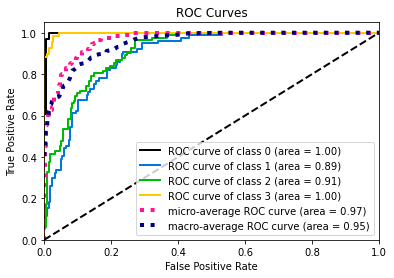

In [8]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scikitplot.metrics import plot_roc
from sklearn.metrics import f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")
                        
C = [100, 10, 1, 0.1, 0.01]

# A simple handwritten param search using cross-validation
def cv_params(c_list, X_train, y_train):
    for c in c_list:
        model = LogisticRegression(C=c, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
        f1_score = cross_val_score(model, X_train, y_train, scoring="f1_macro", cv=5).mean()
        acc = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=5).mean()
        print(f"For C={c} ~> f1 score: {f1_score}, acc: {acc}")

cv_params(C, X_train, y_train)

# Finally let's estimate the model with given hyperparameters
lr = LogisticRegression(C=100, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
y_probas = lr.predict_proba(X_test)
# score = lr.score(X_test, y_test)
# print(f"Accuracy: {score}")

f1 = f1_score(y_test, y_preds, average="macro")
acc = accuracy_score(y_test, y_preds)
print("-"*70, f"Accuracy: {acc}", f"F1 score: {f1}", sep='\n')

plot_roc(y_test, y_probas)

In [9]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

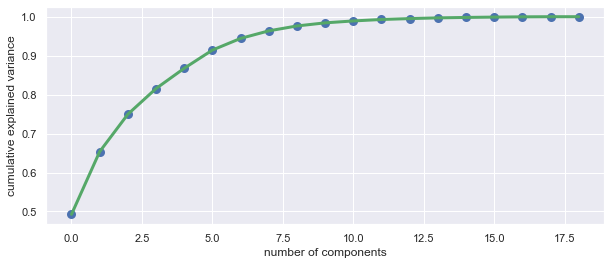

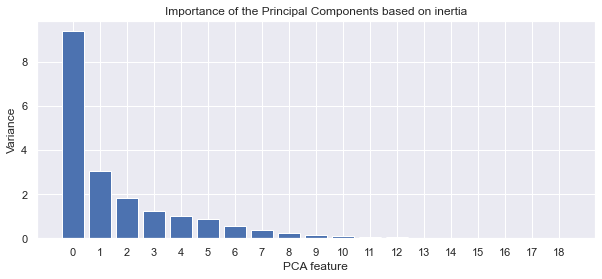

In [10]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
plt.figure(figsize = (10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), c = "g", linewidth = 3)
plt.scatter(np.arange(0, 19), np.cumsum(pca.explained_variance_ratio_), c = "b", linewidth = 3)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

features = range(pca.n_components_)
plt.figure(figsize=(10, 4))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Importance of the Principal Components based on inertia")
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [11]:
### YOUR CODE HERE

# It can be seen from the graph above that 11 components
# are needed to preserve about 99 percent of the variance.
# Therefore, we select the first 11 most important components
pca = PCA(n_components=11)

PrincipalComponentsTrain = pca.fit_transform(X_train)
PrincipalTrain = pd.DataFrame(data = PrincipalComponentsTrain)

PrincipalComponentsTest = pca.transform(X_test)
PrincipalTest = pd.DataFrame(data = PrincipalComponentsTest)

PrincipalTrain

,0,1,2,3,4,5,6,7,8,9,10
0,0.351730,-0.404868,-0.449465,0.564496,-0.432336,-1.138928,-0.340238,-0.000555,0.016584,0.078971,-0.226470
1,-1.884684,1.407584,-0.100237,1.321685,-0.683417,-0.539317,-0.328438,-0.510611,0.469447,0.317553,0.058221
2,-0.296536,0.656354,0.866470,1.148875,1.072568,-0.220741,-0.243692,0.141573,-0.040670,-0.695973,0.303646
3,-0.109382,-1.067980,0.122446,-0.278576,-0.211673,-0.749449,-1.017304,-0.214184,-0.601165,-0.307922,-0.499176
4,-1.206795,0.504370,-0.310459,-0.088486,0.435980,-0.821741,-1.109265,1.056666,-0.173056,0.014094,-0.074841
...,...,...,...,...,...,...,...,...,...,...,...
544,-0.492870,-0.858169,0.435829,0.762595,0.056187,-1.129287,0.484981,-0.830971,-0.359362,-0.059309,-0.455524
545,0.325709,-1.558009,0.409178,-0.646914,-1.855277,-0.740839,1.577218,0.389354,-0.359535,0.058991,0.268018
546,-3.189609,1.216280,-0.425560,-0.317562,-0.618782,0.240683,-0.376739,-0.268980,-0.060248,-0.275820,-0.309377
547,-2.205284,2.993014,0.084391,1.181295,1.033370,-0.364088,0.347409,-0.260874,0.046775,0.237162,0.038454


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [12]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

params = { 
    "C" : [100, 10, 1, 0.1, 0.01],
    "l1_ratio" : np.linspace(0, 1, 5)
}

lr = LogisticRegression(penalty="elasticnet", multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, n_jobs=-1)

grid = GridSearchCV(lr, params)
grid.fit(PrincipalTrain, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial', n_jobs=-1,
                                          penalty='elasticnet', solver='saga',
                                          tol=0.001),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])})

In [13]:
print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best params: {'C': 1, 'l1_ratio': 0.75}
Best score: 0.7066388657214345


----------------------------------------------------------------------
Accuracy: 0.7239057239057239
F1 score: 0.7231855475910545


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

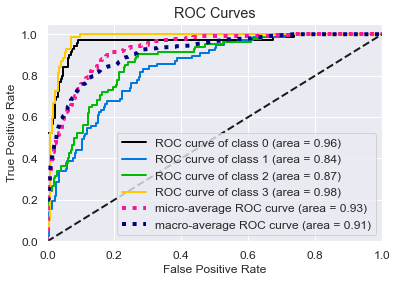

In [14]:
lr = LogisticRegression(penalty="elasticnet", multi_class='multinomial', 
                        solver='saga', tol=1e-3, max_iter=500, n_jobs=-1,
                        C=100, l1_ratio=0.0)

lr.fit(PrincipalTrain, y_train)

y_preds = lr.predict(PrincipalTest)
y_probas = lr.predict_proba(PrincipalTest)
# score = lr.score(X_test, y_test)
# print(f"Accuracy: {score}")

f1 = f1_score(y_test, y_preds, average="macro")
acc = accuracy_score(y_test, y_preds)
print("-"*70, f"Accuracy: {acc}", f"F1 score: {f1}", sep='\n')

plot_roc(y_test, y_probas)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [15]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

tree_params = {"max_depth" : [None] + list(np.arange(10, 45, 5))}

TreeClf = DecisionTreeClassifier()

grid = GridSearchCV(TreeClf, tree_params)
grid.fit(X_train, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best params: {'max_depth': 15}
Best score: 0.7121434528773978


----------------------------------------------------------------------
Accuracy: 0.6835016835016835
F1 score: 0.6959008367455937


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

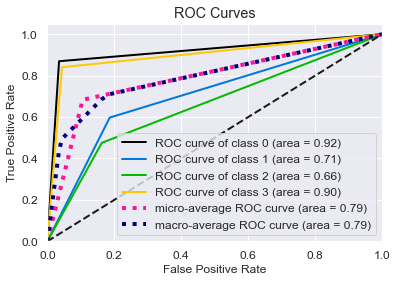

In [16]:
# YOUR CODE HERE

TreeClf = DecisionTreeClassifier(max_depth=15)
TreeClf.fit(X_train, y_train)

y_preds = TreeClf.predict(X_test)
y_probas = TreeClf.predict_proba(X_test)
# score = lr.score(X_test, y_test)
# print(f"Accuracy: {score}")

f1 = f1_score(y_test, y_preds, average="macro")
acc = accuracy_score(y_test, y_preds)
print("-"*70, f"Accuracy: {acc}", f"F1 score: {f1}", sep='\n')

plot_roc(y_test, y_probas)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 


**Bagging + LogisticRegression**


In [34]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold

trees_grid = np.arange(2, 100, 5)

# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []

train_f1_score = []
test_f1_score = []
temp_train_f1_score = []
temp_test_f1_score = []

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    lr = LogisticRegression(penalty="elasticnet", multi_class='multinomial', 
                        solver='saga', tol=1e-3, max_iter=500, n_jobs=-1,
                        C=100, l1_ratio=0.0)
    bag = BaggingClassifier(lr, n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    temp_train_f1_score = []
    temp_test_f1_score = []
    for train_index, test_index in skf.split(data, target):
        X_train, X_test = data[train_index, :], data[test_index, :]
        y_train, y_test = target[train_index], target[test_index]
        bag.fit(X_train, y_train)
        temp_train_acc.append(bag.score(X_train, y_train))
        temp_test_acc.append(bag.score(X_test, y_test))
        temp_train_f1_score.append(f1_score(y_train, bag.predict(X_train), average="macro"))
        temp_test_f1_score.append(f1_score(y_test, bag.predict(X_test), average="macro"))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    train_f1_score.append(temp_train_f1_score)
    test_f1_score.append(temp_test_f1_score)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 72.81% with 62 trees


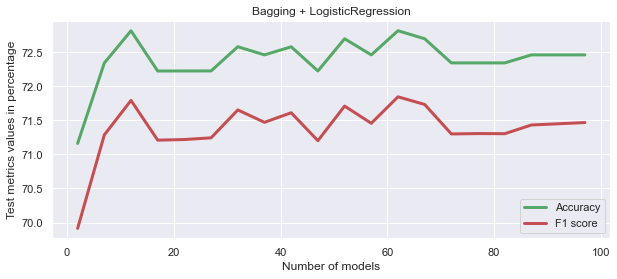

In [41]:
plt.figure(figsize=(10, 4))

plt.plot(trees_grid, test_acc.mean(axis=1)*100, c="g", linewidth=3, label="Accuracy")
plt.plot(trees_grid, np.array(test_f1_score).mean(axis=1)*100, c="r", linewidth=3, label="F1 score")
plt.xlabel("Number of models")
plt.ylabel("Test metrics values in percentage")
plt.legend()
plt.title("Bagging + LogisticRegression")
plt.show()

**Bagging + DecisionTreeClassifier**

In [42]:
trees_grid = np.arange(2, 100, 5)

# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []

train_f1_score = []
test_f1_score = []
temp_train_f1_score = []
temp_test_f1_score = []

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    tree = DecisionTreeClassifier(max_depth=15)
    bag = BaggingClassifier(tree, n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(data, target):
        X_train, X_test = data[train_index, :], data[test_index, :]
        y_train, y_test = target[train_index], target[test_index]
        bag.fit(X_train, y_train)
        temp_train_acc.append(bag.score(X_train, y_train))
        temp_test_acc.append(bag.score(X_test, y_test))
        temp_train_f1_score.append(f1_score(y_train, bag.predict(X_train), average="macro"))
        temp_test_f1_score.append(f1_score(y_test, bag.predict(X_test), average="macro"))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    train_f1_score.append(temp_train_f1_score)
    test_f1_score.append(temp_test_f1_score)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 74.12% with 7 trees


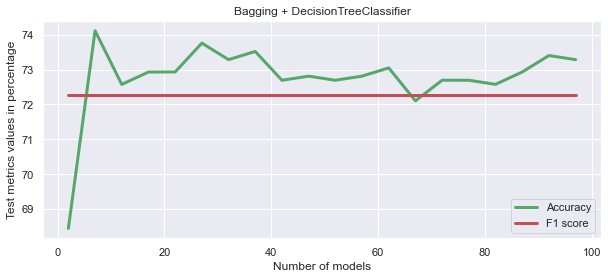

In [43]:
plt.figure(figsize=(10, 4))

plt.plot(trees_grid, test_acc.mean(axis=1)*100, c="g", linewidth=3, label="Accuracy")
plt.plot(trees_grid, np.array(test_f1_score).mean(axis=1)*100, c="r", linewidth=3, label="F1 score")
plt.xlabel("Number of models")
plt.ylabel("Test metrics values in percentage")
plt.legend()
plt.title("Bagging + DecisionTreeClassifier")
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [47]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

parameters = {
    'n_estimators': np.arange(2, 100, 5),
    'max_features': [4, 7, 10, 13, 16, 18],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_depth': [5,10,15,20]
}

rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X_train, y_train)

print(f"Best params: {gcv.best_params_}")
print(f"Best score: {gcv.best_score_}")

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Best params: {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 22}
Best score: 0.7696949891067538


In [65]:
trees_grid = np.arange(2, 100, 5)

# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []

train_f1_score = []
test_f1_score = []
temp_train_f1_score = []
temp_test_f1_score = []

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=1,
                             n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(data, target):
        X_train, X_test = data[train_index, :], data[test_index, :]
        y_train, y_test = target[train_index], target[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
        temp_train_f1_score.append(f1_score(y_train, rfc.predict(X_train), average="macro"))
        temp_test_f1_score.append(f1_score(y_test, rfc.predict(X_test), average="macro"))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    train_f1_score.append(temp_train_f1_score)
    test_f1_score.append(temp_test_f1_score)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 74.82% with 12 trees


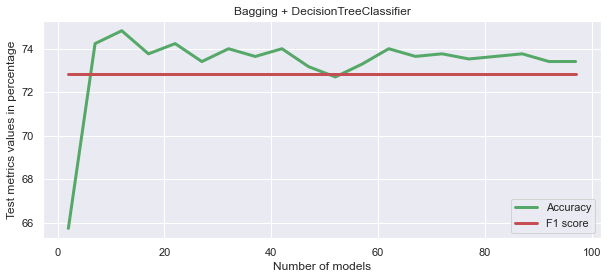

In [66]:
plt.figure(figsize=(10, 4))

plt.plot(trees_grid, test_acc.mean(axis=1)*100, c="g", linewidth=3, label="Accuracy")
plt.plot(trees_grid, np.array(test_f1_score).mean(axis=1)*100, c="r", linewidth=3, label="F1 score")
plt.xlabel("Number of models")
plt.ylabel("Test metrics values in percentage")
plt.legend()
plt.title("Bagging + DecisionTreeClassifier")
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

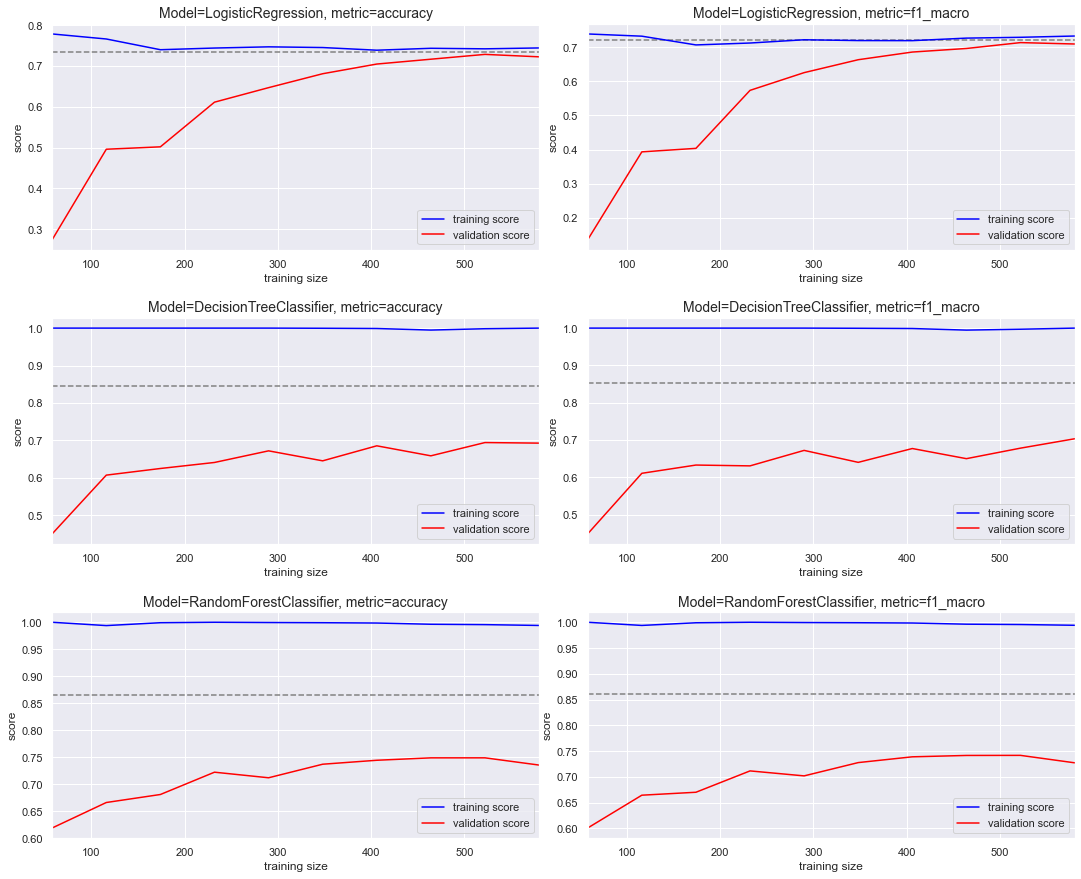

In [91]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve

lr = LogisticRegression(penalty="elasticnet", multi_class='multinomial', 
                        solver='saga', tol=1e-3, max_iter=500, n_jobs=-1,
                        C=100, l1_ratio=0.0)

tree = DecisionTreeClassifier(max_depth=15)

rfc = RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=1,
                             n_estimators=22, random_state=42, n_jobs=-1, oob_score=True)

model_list = [lr, tree, rfc]
scoring_list = ["accuracy", "f1_macro"]

fig, ax = plt.subplots(len(model_list), len(scoring_list), figsize=(16, 12))
fig.tight_layout()
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1, hspace = 0.3)

for i, model in enumerate(model_list):
    for j, metric in enumerate(scoring_list):
        N, train_lc, val_lc = learning_curve(model, X_train, y_train, cv=7,
                                             scoring=metric, train_sizes=np.linspace(0.1, 1, 10))
        
        ax[i][j].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
        ax[i][j].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
        ax[i][j].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
        ax[i][j].set_xlim(N[0], N[-1])
        ax[i][j].set_xlabel('training size')
        ax[i][j].set_ylabel('score')
        ax[i][j].set_title(f'Model={type(model).__name__}, metric={metric}', size=14)
        ax[i][j].legend(loc='best')